# Analise 

In [6]:
import os

path = '../Scenario 3 - all change/data_base/Scenario-03/'
dirs = os.listdir(path)
dirs

['Scenario-03_median_10',
 'Scenario-03_average_30',
 'Scenario-03_zero_30',
 'Scenario-03_zero_70',
 'Scenario-03_median_50',
 'Scenario-03_average_70',
 'Scenario-03_zero_50',
 'Scenario-03_median_70',
 'Scenario-03_average_50',
 'Scenario-03_median_30',
 'Scenario-03_average_10',
 'Scenario-03_zero_10']

In [39]:
import numpy as np
import pandas as pd

data = {}
data['tipo'] = []
data['percentual'] = []
data['F1'] = []

for dir in dirs:
    # print('DIR', dir)
    mean_f1 = []
    for iter in os.listdir(path+dir):
        # print('ITER', iter)
        f1_file = path+dir+'/'+iter+'/F1_score.txt'
        f1 = np.loadtxt(f1_file)
        mean_f1.append(f1.mean())

        pesos        = np.loadtxt(path+dir+'/'+iter+'/pairwise_kernel_weights.txt').mean(axis=0)
        kernel_names = open(path+dir+'/'+iter+'/pairwise_kernel_names.txt','r').read().split('\t')
    
    partes = dir.split('_')
    tipo = partes[1]
    percentual = partes[2]

    data['tipo'].append(tipo)
    data['percentual'].append(int(percentual))
    data['F1'].append(np.mean(mean_f1))

df = pd.DataFrame(data=data)
df.dtypes
df

,tipo,percentual,F1
0,median,10,0.603812
1,average,30,0.593713
2,zero,30,0.530130
3,zero,70,0.478331
4,median,50,0.581394
5,average,70,0.579875
6,zero,50,0.499740
7,median,70,0.588694
8,average,50,0.592168
9,median,30,0.593312


In [33]:
df[df['percentual'] == 50]

,tipo,percentual,F1
4,median,50,0.581394
6,zero,50,0.499740
8,average,50,0.592168


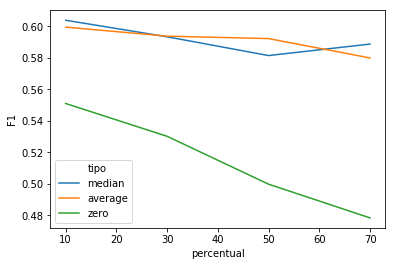

In [37]:
import seaborn as sns
sns.lineplot(x='percentual', y='F1', data=df, hue='tipo')

In [68]:
kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
kcs = [kn.split('.txt')[0] for kn in kernel_names[:-1]]


df2 = pd.DataFrame(data={
    'kd': kds,
    'kc': kcs,
    'peso': pesos} )
df2

,kd,kc,peso
0,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,-2.689296e-09
1,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,1.992380e-08
2,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,3.488368e-03
3,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,2.846394e-08
4,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,5.897824e-08
5,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,2.280895e-08
6,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,1.057388e-08
7,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,2.439760e-08
8,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,1.329847e-08
9,Modified_zero_10_Kd_PubChem,Modified_zero_10_Kd_PubChem,7.366200e-08
